In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [26]:
# 读取 CSV 文件到 DataFrame
# 假设你的文件名是 imdb_top_1000.csv
df = pd.read_csv('imdb_top_1000.csv')

In [27]:
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [28]:
# 打印 DataFrame 的简明摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [29]:
# 生成数值列的描述性统计
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [30]:
# 计算每列的缺失值数量
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [31]:
# --- 修正 Meta_score ---
# 旧写法 (有警告)
# df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)

# 新写法 (推荐)
mean_meta_score = df['Meta_score'].mean()
df['Meta_score'] = df['Meta_score'].fillna(mean_meta_score)


# --- 修正 Certificate ---
# 旧写法 (有警告)
# df['Certificate'].fillna('Unrated', inplace=True)

# 新写法 (推荐)
df['Certificate'] = df['Certificate'].fillna('Unrated')

# 再次检查，确认没有缺失值了
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [32]:
# 清理 Gross 列，并转换为数值类型（百万美元）
# 先移除 ','
df['Gross'] = df['Gross'].str.replace(',', '')
# 转换类型
df['Gross'] = pd.to_numeric(df['Gross'])##to_numeric()将类型转换成数字类型，通常为浮点数或者整数。
##当遇到数据类中可能存在无法识别的内容比如pd.to_numeric(df['Runtime'], errors='coerce') 会成功，并将 'N/A' 转换为 NaN（一个特殊的浮点数值，表示缺失）。结果是 [120.0, 95.0, NaN]。

# Runtime 列也需要清理 ' min' 后缀并转为数值
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)#astype可以强制要求转换成指定类型，担当遇到无法识别的数据就会报错


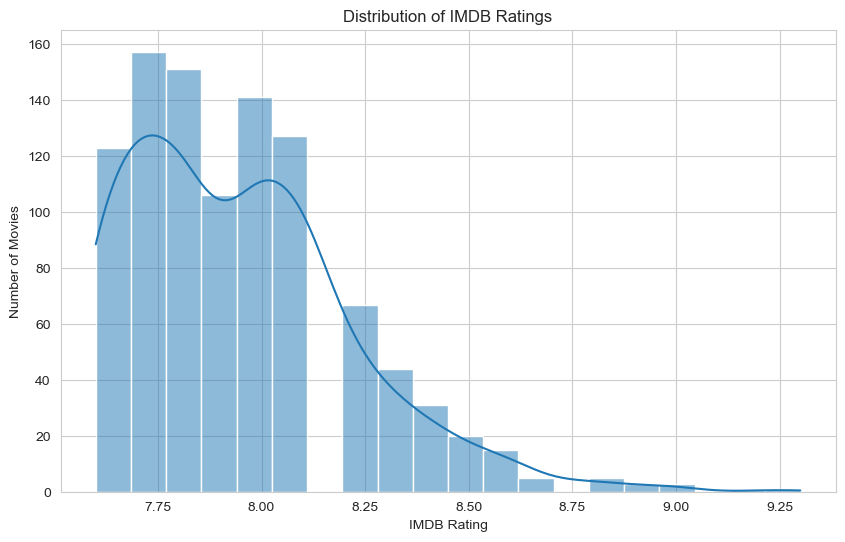

In [33]:
#电影评分 (IMDB_Rating) 的分布是怎样的
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Movies')
plt.show()

Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Christopher Nolan     8
Quentin Tarantino     8
Name: count, dtype: int64


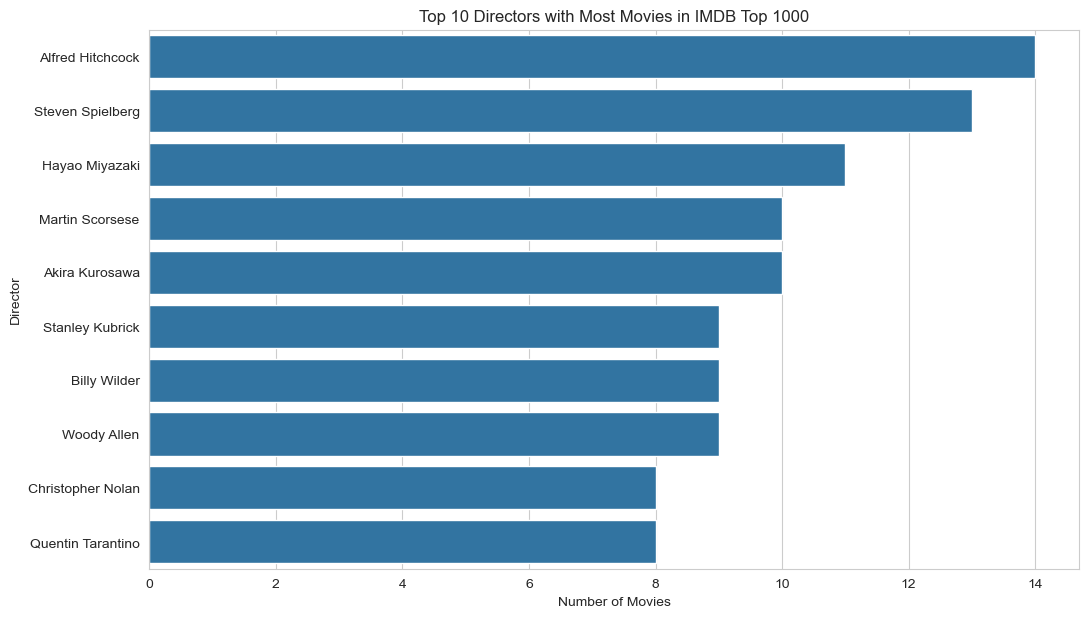

In [34]:
#排名前10的导演是谁？


plt.figure(figsize=(12, 7))
# 使用 value_counts() 统计每个导演出现的次数
top_directors = df['Director'].value_counts().head(10)
print(top_directors)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors with Most Movies in IMDB Top 1000')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

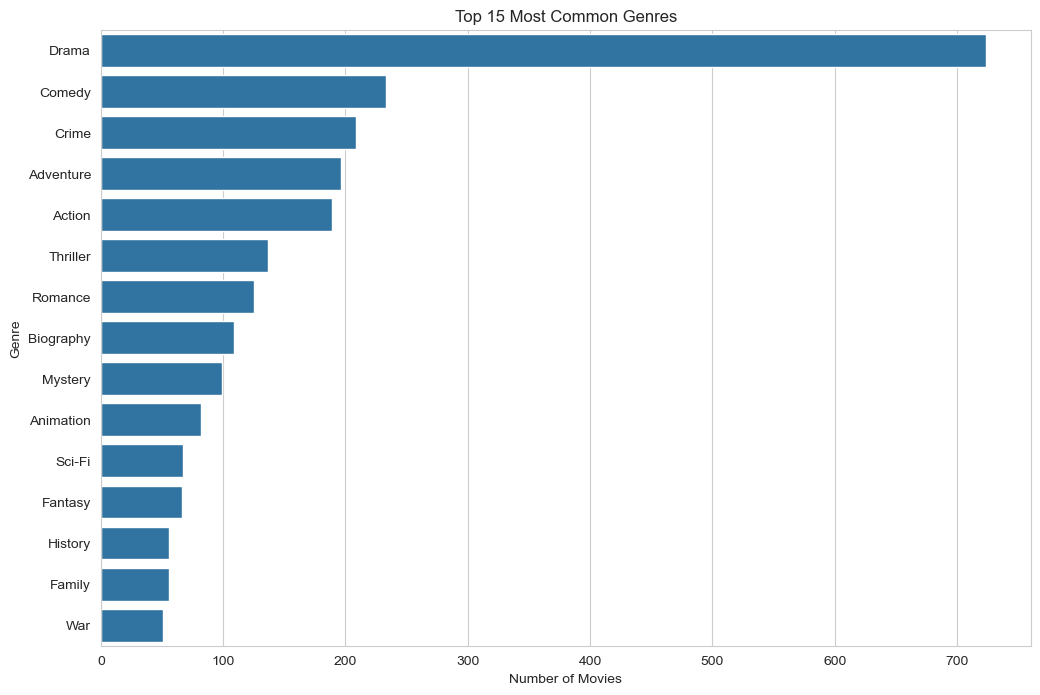

In [35]:
# Genre 列是 "Comedy, Drama, ..." 格式，需要拆分
# 我们创建一个包含所有类型的大列表
genre_list = []
for genres in df['Genre'].str.split(','):
    genre_list.extend([g.strip() for g in genres])

# 将列表转换为 Pandas Series 以便使用 value_counts()
genre_series = pd.Series(genre_list)

plt.figure(figsize=(12, 8))
top_genres = genre_series.value_counts().head(15)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 15 Most Common Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

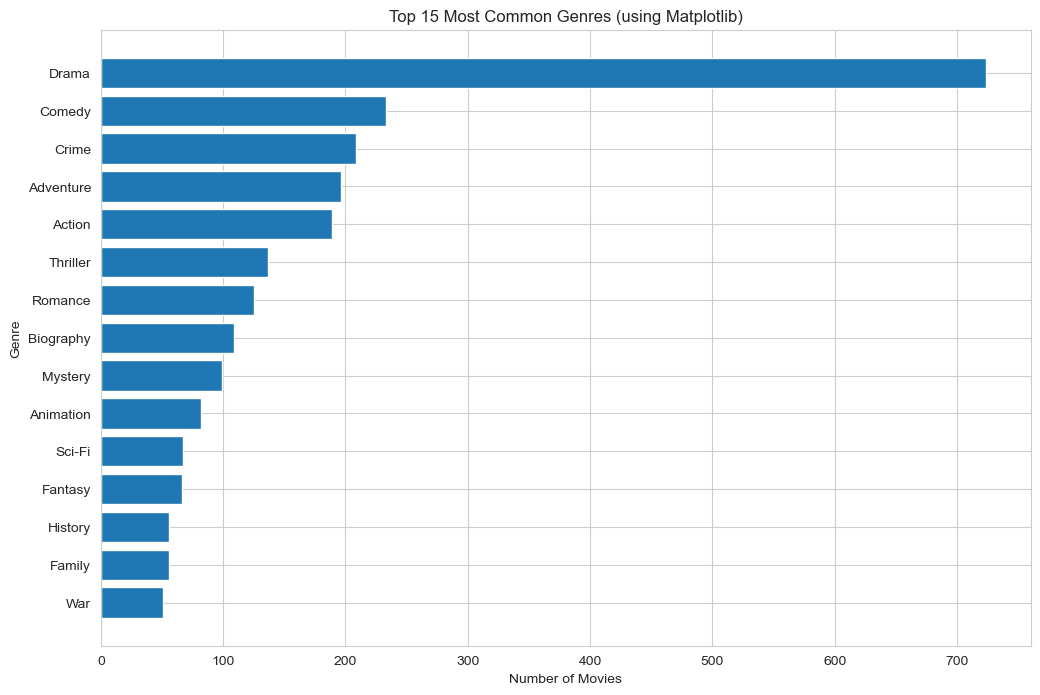

In [36]:

# Genre 列是 "Comedy, Drama, ..." 格式，需要拆分
# 我们创建一个包含所有类型的大列表
genre_list = []
for genres in df['Genre'].str.split(','):
    genre_list.extend([g.strip() for g in genres])

# 将列表转换为 Pandas Series 以便使用 value_counts()
genre_series = pd.Series(genre_list)

# 统计最常见的15个类型 (如果不足15个则统计所有)
top_genres = genre_series.value_counts().head(15)

# --- 绘图部分 (使用Matplotlib) ---

# 1. 创建画布，设定大小 (与之前相同)
plt.figure(figsize=(12, 8))

# 2. 使用 Matplotlib 绘制水平条形图
# plt.barh() 需要两个主要参数:
# y: 条形图在y轴上的标签 (类型名称) -> top_genres.index
# width: 每个条形的宽度 (电影数量) -> top_genres.values
plt.barh(top_genres.index, top_genres.values)

# (可选) 反转y轴，让数量最多的类型显示在最上方
# value_counts() 默认是降序，barh绘制时会将第一个元素放在y轴的底部
# 为了视觉习惯，通常会将最大的值放在顶部
plt.gca().invert_yaxis()#为了符合“排行榜”的视觉习惯（最大值在顶部），我们通常会加上 plt.gca().invert_yaxis() 这行代码。gca()意为"Get Current Axes"（获取当前坐标系），.invert_yaxis()则是将Y轴反转。

# 3. 添加标题和坐标轴标签 (与之前完全相同)
plt.title('Top 15 Most Common Genres (using Matplotlib)')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

# 4. 显示图像 (与之前相同)
plt.show()